In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import models
from keras import layers
from keras.utils import to_categorical


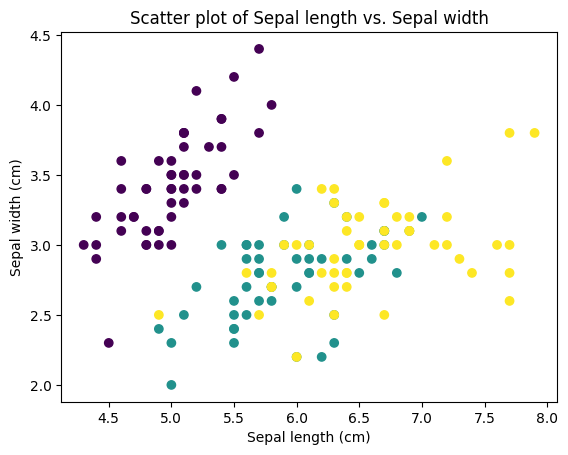

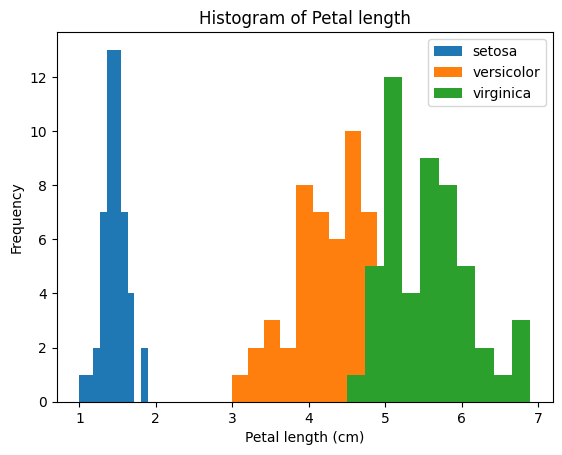

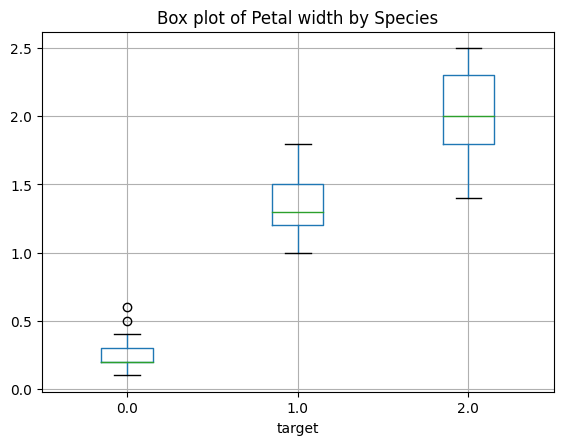

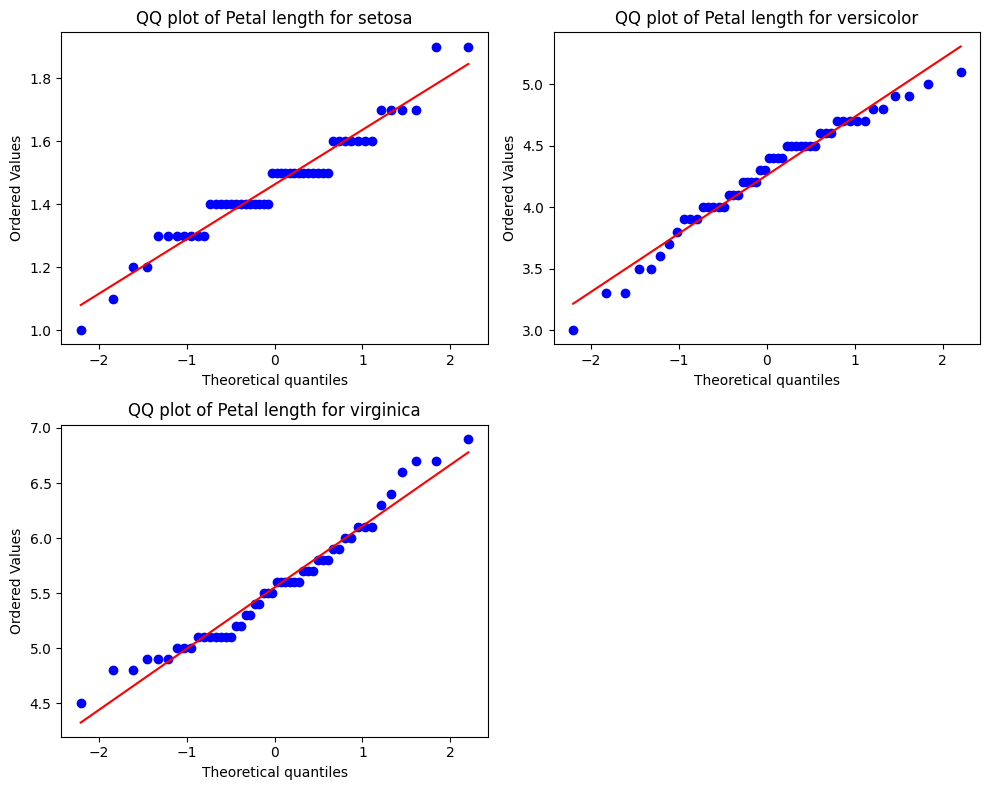

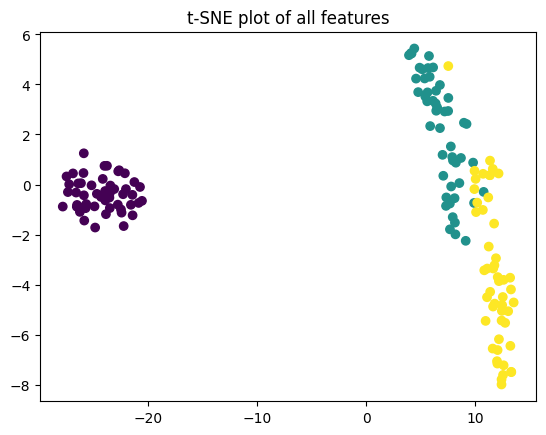

In [57]:

# Load the iris dataset
iris = load_iris()

# Create a dataframe from the dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

# Set target names for plotting
target_names = iris.target_names

# Create a scatter plot of sepal length vs. sepal width
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatter plot of Sepal length vs. Sepal width')
plt.show()

# Create a histogram of petal length for each species
for i, target_name in enumerate(target_names):
    plt.hist(df[df['target'] == i]['petal length (cm)'], label=target_name)

plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal length')
plt.legend()
plt.show()

# Create a box plot of petal width for each species
df.boxplot(column=['petal width (cm)'], by='target')
plt.title('Box plot of Petal width by Species')
plt.suptitle("")
plt.show()

# Create a QQ plot of petal length for each species
from scipy import stats

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create a QQ plot of petal length for each species in each subplot
for i, ax in enumerate(axs.flat):
    if i < 3:
        stats.probplot(df[df['target'] == i]['petal length (cm)'], dist="norm", plot=ax)
        ax.set_title(f'QQ plot of Petal length for {target_names[i]}')
    else:
        ax.set_visible(False)

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the figure
plt.show()


# Create a t-SNE plot of all features
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df.drop(columns=['target']))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'])
plt.title('t-SNE plot of all features')
plt.show()


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Store the best scores and test scores for each model
best_scores = []
test_scores = []


In [59]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

# Iterate over a range of test sizes
for test_size in np.arange(0.1, 0.6, 0.1):

    # Iterate over a range of random states
    for random_state in range(1, 101):

        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_size, random_state=random_state)

        svm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC())
        ])

        svm_param_grid = {
            'svm__C': [0.01, 0.1, 1, 10, 100],
            'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'svm__degree': [1, 2, 3, 4, 5, 6],
        }

        svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)
        svm_grid_search.fit(X_train, y_train)

        if svm_grid_search.best_score_ > best_score:
            best_score = svm_grid_search.best_score_
            best_params = svm_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        # Evaluate the best model on the test data
        best_model = svm_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

        # Append best score and test score to lists
        best_scores.append(best_score)
        test_scores.append(test_score)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)


Best test size: 0.30000000000000004
Best random state: 55
Best parameters found: {'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'linear'}
Best cross-validated training data score found: 1.0
Test dataset score: 0.9733333333333334


In [63]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()

# KNN Grid Search
weight_functions = ["uniform", "distance"]
p_values = [1, 2]
n_range = list(range(1, 51))

param_grid = {"knn__n_neighbors": n_range, "knn__weights": weight_functions, "knn__p": p_values}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)

# Fitting data
grid.fit(iris.data, iris.target)

print(grid.best_params_)
print("Accuracy: %.4f" % grid.best_score_)
best_scores.append(grid.best_score_)
test_scores.append(grid.score(X_test, y_test))

{'knn__n_neighbors': 6, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy: 0.9667


In [3]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

# Use the specified test_sizes
test_sizes = [0.2, 0.25, 0.3, 0.4]

# Iterate over the specified test sizes
for test_size in test_sizes:

    # Use the specified random_state values
    for random_state in [10, 11, 12, 13]:

        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_size, random_state=random_state)

        rf_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier())
        ])

        rf_param_grid = {
            'rf__n_estimators': [10, 50, 100, 200],
            'rf__max_depth': [None, 8, 9, 10],
            'rf__min_samples_split': [2, 5, 10],
            'rf__min_samples_leaf': [1, 2, 4],
            'rf__max_features': [1, 2],
            'rf__max_samples': [0.1, 0.2, 0.3, 0.4]
        }

        rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
        rf_grid_search.fit(X_train, y_train)

        if rf_grid_search.best_score_ > best_score:
            best_score = rf_grid_search.best_score_
            best_params = rf_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        # Evaluate the best model on the test data
        best_model = rf_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)


Best test size: 0.4
Best random state: 11
Best parameters found: {'rf__max_depth': None, 'rf__max_features': 2, 'rf__max_samples': 0.3, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 10}
Best cross-validated training data score found: 1.0
Test dataset score: 0.95


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

best_test_size = None
best_random_state = None
best_params = None
best_score = -1

results = []  # Initialize a list to store the results

# Use the specified test sizes
test_sizes = [0.2, 0.25, 0.3, 0.5]

# Iterate over the specified test sizes
for test_size in test_sizes:

    # Use the specified random_state values
    for random_state in [10, 11, 12, 13]:

        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_size, random_state=random_state)

        mlp_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier())
        ])

        mlp_param_grid = {
            'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'mlp__activation': ['relu', 'tanh', 'logistic'],
            'mlp__solver': ['adam', 'sgd'],
            'mlp__max_iter': [100, 150, 200],
        }

        mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=5, n_jobs=-1)
        mlp_grid_search.fit(X_train, y_train)

        if mlp_grid_search.best_score_ > best_score:
            best_score = mlp_grid_search.best_score_
            best_params = mlp_grid_search.best_params_
            best_test_size = test_size
            best_random_state = random_state

        # Add the current results to the results list
        result = {
            'test_size': test_size,
            'random_state': random_state,
            'best_score': best_score,
            'best_params': str(best_params)
        }
        results.append(result)

        # Evaluate the best model on the test data
        best_model = mlp_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

# Convert the results list to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('mlp_results.csv', index=False)

print("Best test size:", best_test_size)
print("Best random state:", best_random_state)
print("Best parameters found:", best_params)
print("Best cross-validated training data score found:", best_score)
print("Test dataset score:", test_score)


D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\PycharmProjects\cs171\cs171\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\PycharmProjects\cs171\cs1

Best test size: 0.5
Best random state: 10
Best parameters found: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (50, 50), 'mlp__max_iter': 150, 'mlp__solver': 'adam'}
Best cross-validated training data score found: 0.9866666666666667
Test dataset score: 0.9333333333333333


In [ ]:
# Create plots comparing the best cross-validated training data scores and test dataset scores for each model
models = ['SVM', 'KNN', 'RF', 'MLP']
x = np.arange(len(models))

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, best_scores, 0.4, label='Best CV Training Scores')
rects2 = ax.bar(x + 0.2, test_scores, 0.4, label='Test Dataset Scores')

ax.set_ylabel('Scores')
ax.set_title('Scores by Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

results = []

# Use the specified test sizes
test_sizes = [0.2, 0.25, 0.3]

# Iterate over the specified test sizes
for test_size in test_sizes:

    # Iterate over the specified random_state values
    for random_state in [10, 11, 12, 13]:

        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_size, random_state=random_state)

        mlp_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier())
        ])

        mlp_param_grid = {
            'mlp__hidden_layer_sizes': [(10,), (20,), (30,), (20, 20), (30, 30)],
            'mlp__activation': ['identity', 'relu', 'tanh', 'logistic'],
            'mlp__solver': ['lbfgs', 'sgd', 'adam'],
            'mlp__max_iter': [2000],
        }

        mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=5, n_jobs=-1)
        mlp_grid_search.fit(X_train, y_train)

        # Get the best parameters for the current iteration
        current_best_params = mlp_grid_search.best_params_

        result = {
            'test_size': test_size,
            'random_state': random_state,
            'score': mlp_grid_search.best_score_,
            'activation': current_best_params['mlp__activation'],
            'hidden_layer_sizes': current_best_params['mlp__hidden_layer_sizes'],
            'solver': current_best_params['mlp__solver'],
            'max_iter': current_best_params['mlp__max_iter']
        }
        results.append(result)

        # Evaluate the best model on the test data
        best_model = mlp_grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)

results_df = pd.DataFrame(results)
results_df.to_csv('mlp_results2.csv', index=False)

print(results_df)


    test_size  random_state     score activation hidden_layer_sizes solver   
0        0.20            10  0.966667   identity              (20,)    sgd  \
1        0.20            11  0.966667   identity              (30,)  lbfgs   
2        0.20            12  0.975000   identity              (20,)   adam   
3        0.20            13  0.975000   identity           (20, 20)   adam   
4        0.25            10  0.973518   identity           (20, 20)    sgd   
5        0.25            11  0.973518   identity           (20, 20)   adam   
6        0.25            12  0.964427   identity              (10,)   adam   
7        0.25            13  0.973518   identity           (20, 20)   adam   
8        0.30            10  0.971429       relu              (20,)   adam   
9        0.30            11  0.980952       tanh              (10,)   adam   
10       0.30            12  0.961905       relu           (30, 30)    sgd   
11       0.30            13  0.961905       tanh              (1

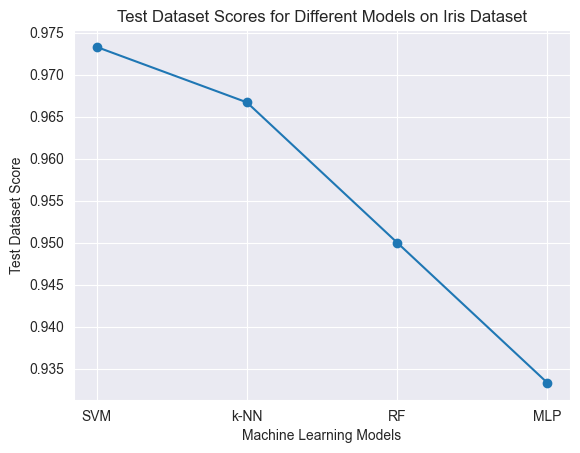

In [9]:
import matplotlib.pyplot as plt

# Store the model names and corresponding test dataset scores
models = ['SVM', 'k-NN', 'RF', 'MLP']
test_scores = [0.9733, 0.9667, 0.95, 0.9333]

# Create a line chart to compare the test dataset scores
plt.plot(models, test_scores, marker='o')

# Add title and labels to the plot
plt.title('Test Dataset Scores for Different Models on Iris Dataset')
plt.xlabel('Machine Learning Models')
plt.ylabel('Test Dataset Score')

# Show the plot
plt.show()
